# INF8225: Travail pratique 1
____

Claudia Onorato (1845448)

# Partie 1
___
L’objectif de la partie I du travail pratique est de permettre à l’étudiant de se familiariser avec les réseaux Bayésiens et la librairie Numpy. Considérons le réseau Bayésien ci-dessous. Il s’agit d’un exemple bien connu appelé « wet grass », souvent utilisé pour illustrer l’effet de « explaining away ».



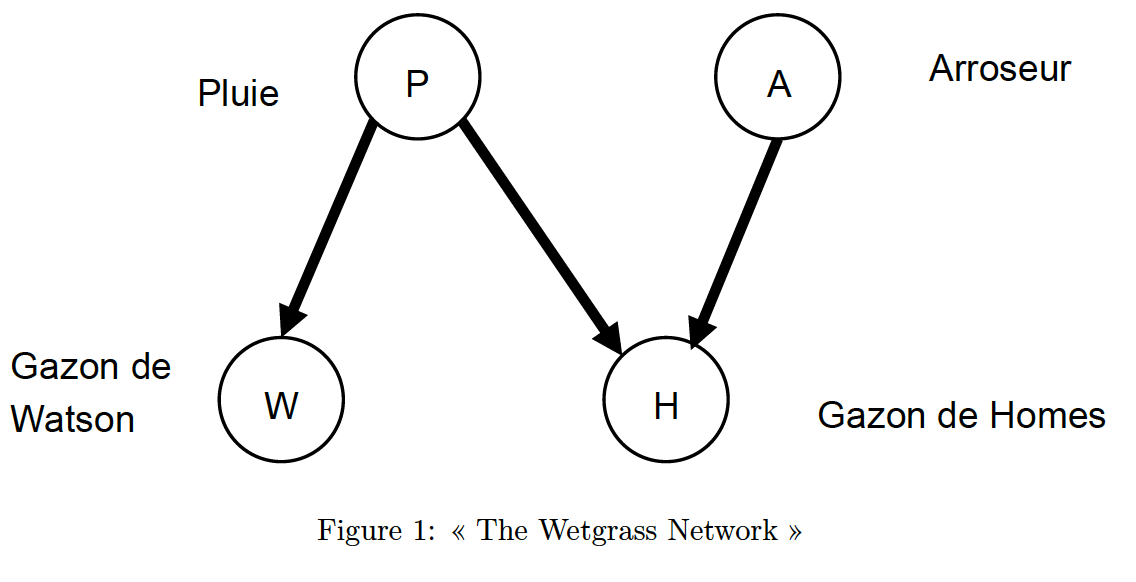

Voici les tables de probabilités conditionnelles fournies:
- La probabilité qu’il ait plu: Pr(P = 1) = 0:2
- La probabilité que l’arroseur ait fonctionné: Pr(A = 1) = 0:1
- La probabilité que le gazon de Watson soit mouillé...
    - ... sachant qu’il a plu est Pr(W = 1jP = 1) = 1
    - ... sachant qu’il n’a pas plu: Pr(W = 1jP = 0) = 0:2
- La probabilité que Holmes remarque que son gazon est mouillé...
    - ... sachant que l’arroseur a fonctionné et qu’il n’a pas plu: Pr(H = 1jP = 0;A = 1) = 0:9
    - ... sachant que l’arroseur n’a pas fonctionné et qu’il n’a pas plu: Pr(H = 1jP = 0;A = 0) = 0
    - ... sachant qu’il a plu, et que l’arroseur ait ou pas fonctionné: Pr(H = 1jP = 1;A = 0; 1) = 1
    
Donnez une équation pour chaque calcul et une explication de quelques phrases concernant les calculs en termes
de concepts d’indépendance conditionnelle et de dépendance conditionnelle quand ces concepts sont applicables.
Vous pouvez calculer les probabilités a), b), c), d), e), et f) en utilisant les arrays suivantes et les propriétés de «
broadcasting » de numpy. Vous devez soumettre votre code et inclure dans le rapport vos explications écrites et
les équations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [2]:
# les arrays sont battis avec les dimensions suivantes:
# pluie, arroseur, Watson, Holmes
# et chaque dimension contient deux éléments: (proba que ça soit faux), (proba que ça soit vrai)

prob_pluie = np.array([0.8, 0.2]).reshape(2, 1, 1, 1)
print(f"Pr(Pluie)= {np.squeeze(prob_pluie)}\n")

prob_arroseur = np.array([0.9, 0.1]).reshape(1, 2, 1, 1)
print(f"Pr(Arroseur)= {np.squeeze(prob_arroseur)}\n")

watson = np.array([
    [0.8, 0.2],     # Pluie = False
    [0  , 1  ]      # Pluie = True
]).reshape(2, 1, 2, 1)
print(f"Pr(Watson|P)= \n{np.squeeze(watson)}\n")

holmes = np.array([
    [ # Pluie = False
        [1. , 0  ], # Arroseur = False
        [0.1, 0.9]  # Arroseur = True
    ],
    [ # Pluie = True
        [0, 1], # Arroseur = False
        [0, 1]  # Arroseur = True
    ],
]).reshape(2,2,1,2)
print(f"Pr(Holmes|P,A)= \n{np.squeeze(holmes)}\n");

Pr(Pluie)= [0.8 0.2]

Pr(Arroseur)= [0.9 0.1]

Pr(Watson|P)= 
[[0.8 0.2]
 [0.  1. ]]

Pr(Holmes|P,A)= 
[[[1.  0. ]
  [0.1 0.9]]

 [[0.  1. ]
  [0.  1. ]]]



In [3]:
prob_watson_wet = (watson*prob_pluie).sum(0).squeeze()[1]

print(f"Pr(W=1|P=0) = {watson[0,:,1,:]}\n")
print(f"Pr(W=1) = Pr(W=1|P=1)*Pr(P=1) + Pr(W=1|P=0)*Pr(P=0) = {prob_watson_wet}\n")

Pr(W=1|P=0) = [[0.2]]

Pr(W=1) = Pr(W=1|P=1)*Pr(P=1) + Pr(W=1|P=0)*Pr(P=0) = 0.36000000000000004



### a) Pr(H = 1)
___

Nous utilisons la loi des probabilités totales pour calculer la probabilité que le gazon de Holmes soit mouillé. Nous assumons que les variables aléatoires `A` (arroseur) et `P` (pluie) sont indépendantes, selon la figure fournie du network.

```
Pr(H=1) = Pr(H=1|A=0,P=0)*P(A=0,P=0) +
          Pr(H=1|A=1,P=0)*P(A=1,P=0) +
          Pr(H=1|A=0,P=1)*P(A=0,P=1) +
          Pr(H=1|A=1,P=1)*P(A=1,P=1)

Par indépendance des variables aléatoires, Pr(A,P) == Pr(A)*Pr(P)

Pr(H=1) = Pr(H=1|A=0,P=0)*P(A=0)*Pr(P=0) +
          Pr(H=1|A=1,P=0)*P(A=1)*Pr(P=0) +
          Pr(H=1|A=0,P=1)*P(A=0)*Pr(P=1) +
          Pr(H=1|A=1,P=1)*P(A=1)*Pr(P=1)
```

In [4]:
prob_holmes_wet = (holmes*prob_arroseur*prob_pluie).sum(0).sum(0).squeeze()[1]
print(f"Pr(H=1) = {prob_holmes_wet}")

Pr(H=1) = 0.272


### b) Pr(H = 1|W = 1)
___

Nous cherchons la probabilité que le gazon soit mouillé chez Holmes sachant qu'il est mouillé chez Watson. Nous utilisons la probabilité conditionnelle de Holmes sachant Watson.

$$Pr(H=1|W=1) = \frac{Pr(W=1,H=1)}{Pr(W=1)} $$

La probabilité que le gazon de Waston soit mouillé a été calculée au numéro a). Pour la probabilité que les gazons de Watson et Holmes, on ne peut assumer que ces variables aléatoires sont indépendantes. Nous allons alors utiliser la loi des probabilités totales.

$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1,H=1|A=a,P=p)*Pr(A=a,P=p)$$

Nous pouvons assumer que les variables $W$ et $H$ indépendantes si l'on connait la variable aléatoire $P$ (pluie). Les variables $A$ et $P$ sont également indépendantes.

$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a,P=p)$$
$$Pr(W=1,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=1|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a)*Pr(P=p)$$

In [5]:
proba_watson_wet_and_holmes_wet = (holmes * watson * prob_arroseur * prob_pluie)[:,:,1,1].sum()
prob_holmes_wet_knowing_watson_wet = proba_watson_wet_and_holmes_wet / prob_watson_wet

print(f"Pr(H=1|W=1) = {proba_watson_wet_and_holmes_wet:.3f}/{prob_watson_wet:.3f} = {prob_holmes_wet_knowing_watson_wet:.3f}")

Pr(H=1|W=1) = 0.214/0.360 = 0.596


### c) Pr(H = 1|W = 0)
___

On reprend les mêmes calculs qu'au b), en ne modifiant que la valeur observée de Watson. On aura alors:

$$Pr(H=1|W=0) = \frac{Pr(W=0,H=1)}{Pr(W=0)}$$

Où la valeur de $Pr(W=0,H=1)$ correspond à:

$$Pr(W=0,H=1) = \sum_{p=0}^{1}\sum_{a=0}^{1} Pr(W=0|A=a,P=p)*Pr(H=1|A=a,P=p)*Pr(A=a)*Pr(P=p)$$

Et où la probabilité que le gazon soit mouillé équivaut à $1-Pr(W=1)$.

In [6]:
proba_watson_dry_and_holmes_wet = (holmes * watson * prob_arroseur * prob_pluie)[:,:,0,1].sum()
prob_watson_dry = 1 - prob_watson_wet
prob_holmes_wet_knowing_watson_dry = proba_watson_dry_and_holmes_wet / prob_watson_dry

print(f"Pr(H=1|W=0) = {proba_watson_dry_and_holmes_wet:.3f}/{prob_watson_dry:.3f} = {prob_holmes_wet_knowing_watson_dry:.3f}")

Pr(H=1|W=0) = 0.058/0.640 = 0.090


### d) Pr(H = 1|P = 0;W = 1)
___

De manière intuitive, comme nous savons que $H$ et $W$ sont conditionnellement indépendant selon $P$, nous nous doutons que $Pr(H=1|P=0,W=1) = Pr(H=1|P=0)$.

Il est possible de le prouver à l'aide des étapes suivantes:

$$Pr(H=1|P=1,W=1) = \frac{Pr(P=0,W=0|H=1)Pr(H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{\frac{Pr(P=0,W=0,H=1)}{Pr(H=1)}Pr(H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(P=0,W=0,H=1)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(W=0,H=1|P=0)Pr(P=0)}{Pr(P=0,W=1)}$$
$$ = \frac{Pr(W=0,H=1|P=0)}{Pr(W=1|P=0)}$$
$$ = \frac{Pr(H=1|P=0)Pr(W=1|P=0)}{Pr(W=1|P=0)}$$
$$ = Pr(H=1|P=0)$$

On définit ensuite cette probabilité avec la loi des probabilités totales:
$$ Pr(H=1|P=0) = \sum_{a=0}^{1} Pr(H=1|A=a,P=0)*Pr(A=a)$$


In [7]:
prob_holmes_wet_knowing_no_rain = (holmes*prob_arroseur)[0,:,:,1].sum()

print(f"Pr(H=1|P=0,W=1) = Pr(H=1|P=0) = {prob_holmes_wet_knowing_no_rain:.3f}")

Pr(H=1|P=0,W=1) = Pr(H=1|P=0) = 0.090


### e) Pr(W = 1|H = 1)
___

Nous cherchons la probabilité que le gazon soit mouillé chez Watson sachant qu'il est mouillé chez Holmes. Nous utilisons la probabilité conditionnelle de Watson sachant Holmes.

$$Pr(W=1|H=1) = \frac{Pr(W=1,H=1)}{Pr(H=1)} $$

La probabilité que le gazon de Watson et de Holmes soit mouillé a été calculé au numéro b). La probabilité que le gazon de Holmes soit mouillé a quant à lui été calculé au numéro a). Nous réutilisons alors ces résultats.

In [8]:
prob_watson_wet_knowing_holmes_wet = proba_watson_wet_and_holmes_wet/prob_holmes_wet
print(f"Pr(W=1|H=1) = {prob_watson_wet_knowing_holmes_wet:.3f}")

Pr(W=1|H=1) = 0.788


### f) Pr(W = 1|H = 1;A = 1)
___

Puisqu'on connait H et A, on peut mettre à jour la fonction de probabilité de P, et conséquemment W. Le calcul de cette probabilité correspond alors à, avec la probabilité conditionnelle:

$$Pr(W=1|H=1,A=1) = \frac{Pr(W=1,H=1,A=1)}{Pr(H=1,A=1)}$$

Par règle de multiplicité:

$$= \frac{Pr(W=1,H=1|A=1)Pr(A=1)}{Pr(H=1|A=1)Pr(A=1)}$$

Par loi de probabilités totales:

$$= \frac{\sum_{p=0}^1 Pr(W=1,H=1|P=p,A=1)Pr(P=p)}{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(P=p)}$$

Par indépendance conditionnelle de H et W sachant P:

$$= \frac{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(W=1|P=p,A=1)Pr(P=p)}{\sum_{p=0}^1 Pr(H=1|P=p,A=1)Pr(P=p)}$$

In [9]:
prob_watson_wet_knowing_holmes_wet_and_arr_wet = (watson*holmes*prob_pluie)[:,1,1,1].sum()/(holmes*prob_pluie)[:,1,:,1].sum()

print(f"Pr(W=1|H=1,A=1) = {prob_watson_wet_knowing_holmes_wet_and_arr_wet:.3f}")

Pr(W=1|H=1,A=1) = 0.374


# Partie 2
___

La partie 2 consiste à implémenter la descente du gradient pour optimiser la log-vraisemblance négative comme fonction de perte afin de faire de la classification d'image.

Note: Mes commentaires sont en anglais pour alléger la lecture, comme plusieurs termes sont plus souvent consultés en anglais.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Loading dataset
___

In [11]:
digits = datasets.load_digits()

X = np.hstack((digits.data, np.ones((digits.data.shape[0],1))))
y = digits.target

y_one_hot = np.zeros((y.shape[0], len(np.unique(y))))
y_one_hot[np.arange(y.shape[0]), y] = 1  # One hot encoding of shape (N,K), where N: nb of observations and K: nb of classes

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Defining utils function
___


In [12]:
def get_y_pred(current_X, W):

    Z = np.dot(current_X, W.T)
    return np.array([softmax(z) for z in Z])

def softmax(x):
    # assurez vous que la fonction est numeriquement stable
    # e.g. softmax(np.array([1000, 10000, 100000], ndim=2))
    
    x = x - max(x)
    exp_sum = sum(np.exp(x))
    return np.exp(x)/exp_sum

def get_accuracy(X, y, W):
    y_pred = get_y_pred(X, W)
    nb_correct_class = 0
    
    for i in range(y.shape[0]):
        expected_class_has_highest_probability = (y[i] * y_pred[i]).sum() == max(y_pred[i])
        if expected_class_has_highest_probability:
            nb_correct_class += 1
            
    return nb_correct_class/y.shape[0]

def get_grads(y, y_pred, X):
    """
        Returns the gradients, of shape (nb_classes, nb_features+1), of the negative log likelihood function, in our case the loss function.
        
        y:      labels of shape (nb_observations, nb_classes)
        y_pred: probabilities for each class and each observation of shape (nb_observations, nb_classes)
        X:      features matrix of shape (nb_observations, nb_features+1)
    """
    # Both terms are shaped: (nb_class,nb_features+1)
    first_term_sum = np.zeros((y.shape[1], X.shape[1]))
    second_term_sum = np.zeros((y.shape[1], X.shape[1]))

    for i in range(y.shape[0]):
        first_term_sum += np.outer(y[i], X[i])
        second_term_sum += np.outer(y_pred[i], X[i])

    return -(1/y.shape[0])*(first_term_sum - second_term_sum)

def get_loss(y, y_pred):
    """
        Returns the loss calculated from the mean negative log likelihood loss function.
        
        y:      labels of shape (nb_observations, nb_classes)
        y_pred: probabilities for each class and each observation of shape (nb_observations, nb_classes)
    """
    loss = 0
    
    for i in range(y.shape[0]): # for each observation
        loss += -np.log((y[i]*y_pred[i]).sum())

    return loss/y.shape[0]

## Mini-batch stochastic gradient descent
___ 

In [13]:
def get_mini_batch_stoch_gradient_descent(minibatch_nb=20, learning_rate=0.001):

    W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))

    nb_feature = X.shape[1] # includes the bias
    nb_classes = y_one_hot.shape[1]

    best_W = None
    best_accuracy = 0
    lr = learning_rate
    nb_epochs = 50
    minibatch_size = len(y)//minibatch_nb

    losses = []
    accuracies = []

    for epoch in range(nb_epochs):
        loss = 0
        accuracy = 0
        for i in range(0, X_train.shape[0], minibatch_size):
            current_X = X_train[i: min(i + minibatch_size, X_train.shape[0])]
            current_y = y_train[i: min(i + minibatch_size, X_train.shape[0])]
            current_batch_size = current_X.shape[0]

            y_pred = get_y_pred(current_X, W)
            W -= lr * get_grads(current_y, y_pred, current_X) # grad: shape (10,65)

        y_pred = get_y_pred(X_train, W)
        loss = get_loss(y_train, y_pred)
        losses.append(loss)  # compute the loss on the train set

        accuracy = get_accuracy(X_validation, y_validation, W)  # TODO
        accuracies.append(accuracy) # compute the accuracy on the validation set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_W = W  # select the best parameters based on the validation accuracy 
    
    return best_W, losses, accuracies

In [14]:
%%time

best_W, losses, _ = get_mini_batch_stoch_gradient_descent()

CPU times: user 6.46 s, sys: 438 ms, total: 6.89 s
Wall time: 4.09 s


In [15]:
accuracy_on_unseen_data = get_accuracy(X_test, y_test, best_W)
print(accuracy_on_unseen_data)

0.9481481481481482


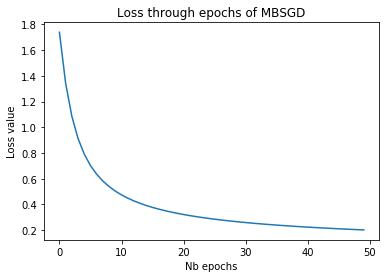

In [16]:
plt.xlabel("Nb epochs")
plt.ylabel("Loss value")
plt.title("Loss through epochs of MBSGD")
plt.plot(losses)

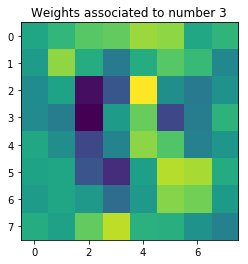

In [17]:
plt.title("Weights associated to number 3")
plt.imshow(best_W[3, :-1].reshape(8,8))

### Analyze and select best parameters
---

#### 1. Number of minibatch
___

We will first explore different values for the number of mini-batch, and see which value minimizes the loss more quickly and maximizes the accuracy of the validation set more quickly. We will also consider the accuracy of the test set.

We arbitrarily set the learning rate to **0.001**.

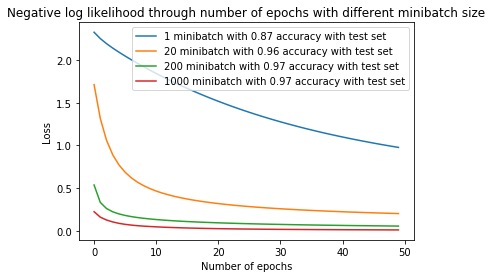

In [18]:
minibatch_nb_to_explore = [1, 20, 200, 1000]

for nb in minibatch_nb_to_explore:
    best_W, losses, _ = get_mini_batch_stoch_gradient_descent(minibatch_nb=nb)
    accuracy = get_accuracy(X_test, y_test, best_W)
    plt.plot(losses, label=f"{nb} minibatch with {accuracy:.2f} accuracy with test set")

plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Negative log likelihood through number of epochs with different minibatch size")
plt.legend()

We can see the number of minibatch greatly influence the value of the log loss over the number of epochs. Since the minibatch version of the gradient descent is a compromise between the original gradient descent, which is slower but more accurate, and the batch gradient descent, which is faster and less accurate, we can see we go to a more accurate model, with a better accuracy, when we increase the number of minibatch. 

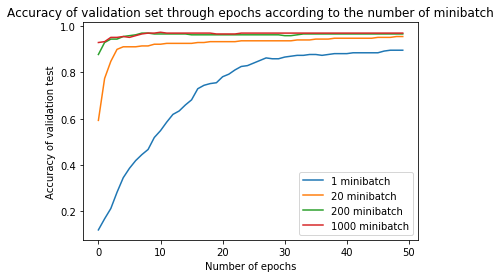

In [19]:
for nb in minibatch_nb_to_explore:
    _, _, accuracies = get_mini_batch_stoch_gradient_descent(minibatch_nb=nb)
    plt.plot(accuracies, label=f"{nb} minibatch")

plt.xlabel("Number of epochs")
plt.ylabel("Accuracy of validation test")
plt.title("Accuracy of validation set through epochs according to the number of minibatch")
plt.legend()

We can see the same tendancy with the validation set accuracy through the number of epochs, where it is better to increase the minibatch number. Because we know that increasing the number of minibatches increases the number of times we have to update our gradient, and therefore makes the training longer, a reasonable number of minibatches, according to the graphs, would be 200. We can also see in the first graph's legend that its test set accuracy is the same as with the 1000 minibatch.

**Chosen number of minibatch: 200**

#### 2. Learning rate
___

We will then explore different values of learning rates. We will fix the number of batches to the number selected previously, which is 200.

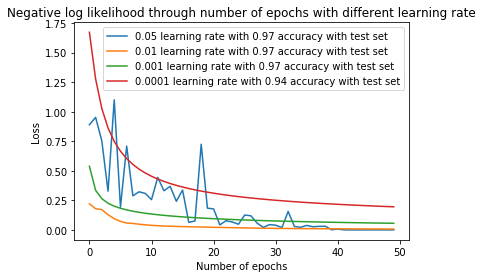

In [20]:
CHOSEN_MINIBATCH_NB = 200

learning_rates_to_explore = [0.05, 0.01, 0.001, 0.0001]

for lr in learning_rates_to_explore:
    best_W, losses, _ = get_mini_batch_stoch_gradient_descent(learning_rate=lr, minibatch_nb=CHOSEN_MINIBATCH_NB)
    accuracy = get_accuracy(X_test, y_test, best_W)
    plt.plot(losses, label=f"{lr} learning rate with {accuracy:.2f} accuracy with test set")

plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Negative log likelihood through number of epochs with different learning rate")
plt.legend()

Firstly, we can see that a smaller learning rate involves a smaller accuracy at the same number of epochs and a less steep curve in the graph above, as expected. Indeed, by taking smaller steps in the opposite direction of the gradient, we slow down the descent to the local minima of our loss function.

We can also see that the biggest learning rate has rippling effects, which can be explained by the number of batches selected. Indeed, if we select fewer number of minibatches, the curve is smooth like the others. Thus, since we try to learn fast from a too few observations, we can get farther from the local minima by updating our weights.

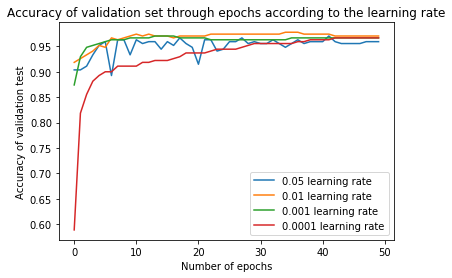

In [21]:
for lr in learning_rates_to_explore:
    _, _, accuracies = get_mini_batch_stoch_gradient_descent(learning_rate=lr, minibatch_nb=CHOSEN_MINIBATCH_NB)
    plt.plot(accuracies, label=f"{lr} learning rate")

plt.xlabel("Number of epochs")
plt.ylabel("Accuracy of validation test")
plt.title("Accuracy of validation set through epochs according to the learning rate")
plt.legend()

As with the last graph, we can also see the smaller learning rates has a poorer accuracy with the validation test.

We then select **0.01 as our learning rate**.

In [22]:
CHOSEN_LR = 0.01

best_W, losses, accuracies = get_mini_batch_stoch_gradient_descent(learning_rate=CHOSEN_LR, minibatch_nb=CHOSEN_MINIBATCH_NB)

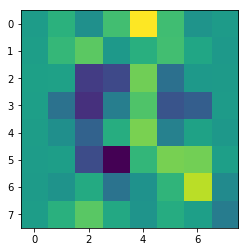

In [23]:
plt.imshow(best_W[3, :-1].reshape(8,8))


## Adam
___

Below is the pseudocode to compute the adam method, taken from [[source]](https://arxiv.org/pdf/1412.6980.pdf).

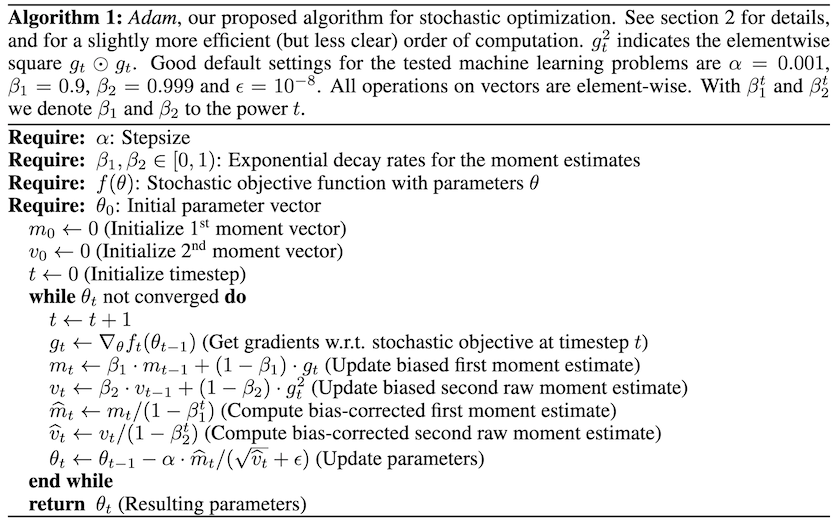

We can see we have the following parameters:
- $\alpha$: stepsize or learning rate. Recommended value is 0.001
- $\beta_1$ et $\beta_2$:  1st and 2nd moment estimate. Recommended value are resp. 0.9 and 0.999.
- $\epsilon$: numerical number. Recommended value is $10^{-8}$.
- Iteration number: There is no recommended value. We will set at it at 50, like the number of epochs in the previous method.

In [24]:
def get_adam(minibatch_nb=20, learning_rate=0.001, beta_1=0.9, beta_2=0.999, eps=10e-8):

    W = np.random.normal(0, 0.01, (len(np.unique(y)), X.shape[1]))

    nb_feature = X.shape[1] # includes the bias
    nb_classes = y_one_hot.shape[1]

    best_W = None
    best_accuracy = 0
    lr = learning_rate
    nb_epochs = 50
    minibatch_size = len(y)//minibatch_nb
    
    m = 0
    v = 0

    losses_train = []
    losses_valid = []
    accuracies = []

    for epoch in range(nb_epochs):
        loss = 0
        accuracy = 0
        for i in range(0, X_train.shape[0], minibatch_size):
            current_X = X_train[i: min(i + minibatch_size, X_train.shape[0])]
            current_y = y_train[i: min(i + minibatch_size, X_train.shape[0])]
            current_batch_size = current_X.shape[0]

            y_pred = get_y_pred(current_X, W)

            g = get_grads(current_y, y_pred, current_X)
            m = beta_1 * m + (1 - beta_1) * g
            v = beta_2 * v + (1 - beta_2) * np.power(g, 2)
            m_hat = m / (1 - np.power(beta_1, epoch + 1))
            v_hat = v / (1 - np.power(beta_2, epoch + 1))
            W -= lr * m_hat / (np.sqrt(v_hat) + eps)
        
        # compute the loss on the train set
        y_pred = get_y_pred(X_train, W)
        loss_train = get_loss(y_train, y_pred)
        losses_train.append(loss_train) 
        
        # compute the loss on the valid set
        y_pred_valid = get_y_pred(X_validation, W)
        loss_valid = get_loss(y_validation, y_pred_valid)
        losses_valid.append(loss_valid)  

        accuracy = get_accuracy(X_validation, y_validation, W)  # TODO
        accuracies.append(accuracy) # compute the accuracy on the validation set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_W = W  # select the best parameters based on the validation accuracy 
    
    return best_W, losses_train, losses_valid, accuracies

In [27]:
%%time

adam_best_W, adam_losses_train, adam_losses_valid, adam_accuracies = get_adam()

CPU times: user 7.36 s, sys: 497 ms, total: 7.86 s
Wall time: 4.57 s


In [28]:
accuracy_on_unseen_data = get_accuracy(X_test, y_test, adam_best_W)
print(accuracy_on_unseen_data)

0.9518518518518518


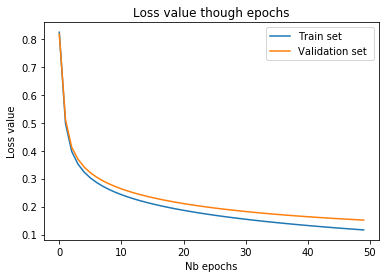

In [29]:
plt.plot(adam_losses_train, label="Train set")
plt.plot(adam_losses_valid, label="Validation set ")

plt.legend()
plt.title("Loss value though epochs")
plt.xlabel("Nb epochs")
plt.ylabel("Loss value")
plt.show()

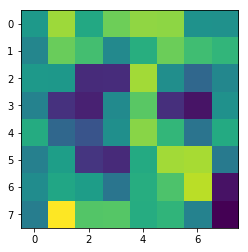

In [30]:
plt.imshow(adam_best_W[3, :-1].reshape(8,8))

## Comparaison between Adam and MBSGD
___

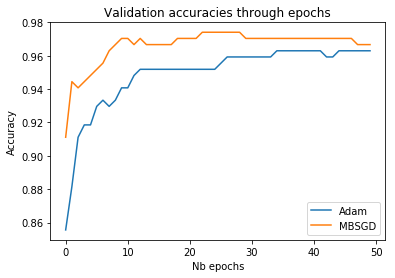

In [32]:
plt.plot(adam_accuracies, label="Adam")
plt.plot(accuracies, label="MBSGD")

plt.legend()
plt.title("Validation accuracies through epochs")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.show()

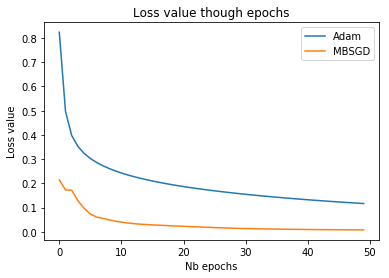

In [33]:
plt.plot(adam_losses_train, label="Adam")
plt.plot(losses, label="MBSGD")

plt.legend()
plt.title("Loss value though epochs")
plt.xlabel("Nb epochs")
plt.ylabel("Loss value")
plt.show()

We can see that in the case of the accuracies on the validation set and the loss value, the results are better using the stochastic gradient descent. 